        PYTHON DATA MANIPULATION

The data set used for this project can be found in the UCI machine learning repository <"http://archive.ics.uci.edu/ml/datasets/Online+Retail">.
It contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

    1 - LOADING THE REQUIRED LIBRARIES

In [1]:
import pandas as pd
import seaborn as sns
import zipfile
import matplotlib.pyplot as plt
%matplotlib inline

    2 - LOADING CUSTOMERS DATA SET

In [2]:
zf = zipfile.ZipFile('data.csv.zip') 
customer_df = pd.read_csv(zf.open('data.csv'), encoding="ISO-8859-1")
customers = customer_df.copy()

Some variables (listed below) are coded as 'object'. One way to reduce the memory usage is to recode them into 'category' variables.

In [3]:
for col in ['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Country']:
    customers[col] = customers[col].astype('category')
customers['InvoiceDate'] = pd.to_datetime(customers['InvoiceDate'])

In [4]:
print(customer_df.info())

print()

print(customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null category
StockCode      541909 non-null category
Description    540455 non-null category
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null category
Country        541909 non-null category
dtypes: category(5), datetime64[ns](1), float64(1), int64(1)
memory usage: 19.1 MB
N

In [ ]:
Notice above that we reduced the memory usage from 33.1 MB to 19.1 MB.

The results below show  ~25% of data is not assigned to any customer. As we cannot impute CustomerID, so we can delete them from customer_df.

In [5]:
cust = pd.DataFrame(customers.dtypes).T.rename(index = {0: 'Column type'})
cust.loc['Total unique values'] = customers.apply(lambda x: x.nunique()).tolist()
cust.loc['Percentage of nan'] = round(customers.isnull().sum() / len(customers) * 100, 2)
cust

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Column type,category,category,category,int64,datetime64[ns],float64,category,category
Total unique values,25900,4070,4223,722,23260,1630,4372,38
Percentage of nan,0,0,0.27,0,0,0,24.93,0


In [6]:
customers = customers[customers['CustomerID'].notnull()]

cust = pd.DataFrame(customers.dtypes).T.rename(index = {0: 'Column type'})
cust = cust.append(pd.DataFrame(round(customers.isnull().sum() / len(customers) * 100, 2)).T.rename(index = {0: '% nan'}))
cust

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Column type,category,category,category,int64,datetime64[ns],float64,category,category
% nan,0,0,0,0,0,0,0,0


Let's take a sample to have an overview of our data. As we can see below, the data frame contains 8 variables:

- InvoiceNo: each unique combination indicates a transaction. Notice that this variable may contain a letter 'C'  before the digits, indicating a concellation (the purchase was cancelled);
- StockCode: unique code for each item;
- Description: describe the item purchased or cancelled;
- Quantity: total quantity of referenced item per transaction;
- Invoicedate: date and hour of each transaction;
- UnitPrice: price per unit;
- CustomerID: unique number per customer;
- Country: the country were each customer lives. 

In [7]:
customers.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
249953,558990,23251,VINTAGE RED ENAMEL TRIM MUG,12,2011-07-05 11:30:00,1.25,13489.0,United Kingdom
324769,565416,22712,CARD DOLLY GIRL,12,2011-09-04 12:00:00,0.42,12710.0,Germany
116931,546314,72741,GRAND CHOCOLATECANDLE,9,2011-03-10 19:05:00,1.45,16808.0,United Kingdom
485236,577557,21137,BLACK RECORD COVER FRAME,12,2011-11-20 15:36:00,3.75,15426.0,United Kingdom
218838,556072,47590A,BLUE HAPPY BIRTHDAY BUNTING,6,2011-06-08 14:57:00,5.45,16126.0,United Kingdom


      FEATURE INDENTIFICATION

          1 - Country

In [8]:
pd.DataFrame((customers.groupby('Country')['CustomerID'].count() / len(customers)).nlargest(10)).T

Country,United Kingdom,Germany,France,EIRE,Spain,Netherlands,Belgium,Switzerland,Portugal,Australia
CustomerID,0.889509,0.023339,0.020871,0.018398,0.006226,0.005828,0.005086,0.004614,0.003638,0.003095


Text(0.5,1,'Proportion of customers per country')

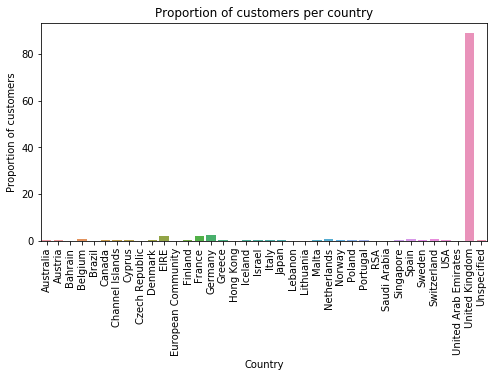

In [9]:
import warnings
warnings.filterwarnings("ignore")

dd = pd.DataFrame((customers.groupby('Country')['CustomerID'].count() / len(customers) * 100)).reset_index().sort_values('Country',ascending=False)
plt.subplots(figsize = (8, 4))
plt.xticks(rotation=90)
sns.barplot(x = dd.Country, y = dd.CustomerID).set(ylabel='Proportion of customers')
plt.title('Proportion of customers per country')

In [10]:
customers = customers[customers['Country'] == 'United Kingdom']

In [11]:
cust = pd.DataFrame(customers.dtypes).T.rename(index = {0: 'Column type'})
cust.loc['Total unique values'] = customers.apply(lambda x: x.nunique()).tolist()
cust.loc['Percentage of nan'] = round(customers.isnull().sum() / len(customers) * 100, 2)
cust

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Column type,category,category,category,int64,datetime64[ns],float64,category,category
Total unique values,19857,3661,3860,426,18441,569,3950,1
Percentage of nan,0,0,0,0,0,0,0,0


In [12]:
customers.drop_duplicates(inplace=True)
print('After deleting duplicate rows, the new data set has {0} rows and {1} columns.'. format(customers.shape[0], customers.shape[1]))

After deleting duplicate rows, the new data set has 356728 rows and 8 columns.


        b- InvoiceDate

In [13]:
""" Let's focus on one year of movement (activity or sale) from 2010-12-09 to 2011-12-09 """
customers = customers[customers['InvoiceDate'] >= '2010-12-09']

        c- InvoiceNo

In [14]:
'''Check if all the rows with InvoiceNo Cancelled have negative Quantity also'''
check_invoice = customers[customers.InvoiceNo.str.match('C')][['InvoiceNo', 'Quantity']]

for index, col in check_invoice.iterrows():
    if col[1] > 0:
        print(index)
        break

First of all, notice that all the orders cancelled have Quantity coded as negative.

In [15]:
""" Let's make a copy of customer in order to compare the results before and after cleaning"""
custom = customers.copy()

In [16]:
entry_to_remove = [] ; doubtfull_entry = []

for index, col in  custom.iterrows():
    if col['Quantity'] > 0: continue
    # we have a returned item = cancelled
    # find all the previous purchases from the same customer, same stockCode
    df_test = custom[(custom['CustomerID'] == col['CustomerID']) &
                     (custom['StockCode']  == col['StockCode']) & 
                     (custom['InvoiceDate'] <= col['InvoiceDate']) & 
                     (custom['Quantity'] > 0)].copy()

    # Return WITHOUT counterpart(no previous purchase mentionned before)
    if (df_test.shape[0] == 0): 
        doubtfull_entry.append(index)
        continue
    
    # If any purchase, sort them all by InvoiceDate(most recent)
    df_test.sort_values('InvoiceDate', ascending=False, inplace=True)
    
    # Loop over all the quantities found
    for i, val in df_test.iterrows():
        remaining_quantity = val['Quantity'] + col['Quantity']
        
        # We've found a match: remove both cancellation and original purchase
        if remaining_quantity == 0:
            entry_to_remove.append(index)
            entry_to_remove.append(i)
            break
            
        # Quantity > number of returned items: remove the quantity
        # that has been returned, and delete the line indicating the return     
        elif remaining_quantity > 0:
            entry_to_remove.append(index)
            val['Quantity'] += col['Quantity']
            break
        # Quantity < number of returned items: remove the        
        else:
            col['Quantity'] = remaining_quantity
            entry_to_remove.append(index)
            entry_to_remove.append(i)

In [18]:
'''Drop entry_to_remove and Doubtful_entry from custom'''
custom.drop(entry_to_remove, axis = 0, inplace = True)
custom.drop(doubtfull_entry, axis = 0, inplace = True)

In [19]:
a = customers[customers.InvoiceNo.str.match('C')]['StockCode'].count()
b = custom[custom.InvoiceNo.str.match('C')]['StockCode'].count()

c = customers[customers.Quantity < 0]['InvoiceNo'].count()
d = custom[custom.Quantity < 0]['InvoiceNo'].count()

e = len(customers)
f = len(custom)

g = customers.CustomerID.nunique()
h = custom.CustomerID.nunique()

pd.DataFrame({'Total InvoiceNo cancelled': [a, b], 'Total negative Quantity': [c, d], 'Total rows': [e, f], 'Total customers': [g, h]}).rename({0: 'Before', 1: 'After'}, axis = 'index')

,Total InvoiceNo cancelled,Total negative Quantity,Total rows,Total customers
Before,7296,7296,344966,3891
After,0,0,335476,3855


The table above shows that ~44 customers(4372 - 4328) have returned their items. So we removed from the new data frame (custom).

In [20]:
print(custom[custom.UnitPrice == 0]['InvoiceNo'].count())
custom = custom[custom.UnitPrice > 0]
print(custom.shape)

22
(335454, 8)


Notice that there are 38 zero entries for UnitPrice. We decided to remove them as they will not contribute to the totalPrice.

In [21]:
'''Save the data set for further use'''
custom.to_csv('custom.csv', encoding='utf-8', index=False)

In [21]:
'''Add a new col TotalPrice = custom['Quantity'] * custom['UnitPrice']. This ,variable will be used later to comptre RFM'''

import warnings
warnings.filterwarnings("ignore")


custom['TotalPrice'] = custom['Quantity'] * custom['UnitPrice']

Text(0.5,1,'Top 5 best selling items')

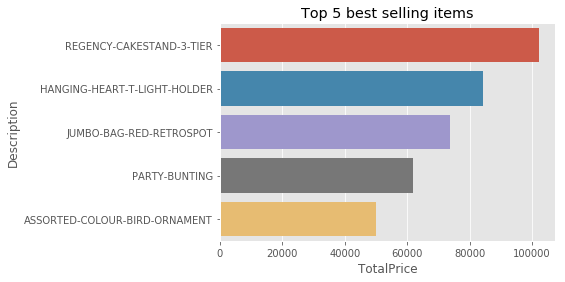

In [22]:
""" Top 5 best items sold """
import warnings
warnings.filterwarnings('ignore')

import matplotlib as mpl

mpl.style.available 
mpl.style.use('ggplot')


""" Find total transactions per StockCode """
a = pd.DataFrame(custom.groupby('StockCode')['TotalPrice'].sum().sort_values().nlargest(5)).melt()

a['Description'] = ['REGENCY-CAKESTAND-3-TIER', 'HANGING-HEART-T-LIGHT-HOLDER', 'JUMBO-BAG-RED-RETROSPOT','PARTY-BUNTING', 'ASSORTED-COLOUR-BIRD-ORNAMENT']      

a.rename(columns = {'value': 'TotalPrice'}, inplace=True)
sns.barplot(x = 'TotalPrice', y = 'Description', data = a)
plt.title('Top 5 best selling items')

In [23]:
""" Find the top five customers who spent a lot of money """
pd.DataFrame(custom.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).nlargest()).reset_index()

,CustomerID,TotalPrice
0,18102.0,233736.93
1,17450.0,188536.59
2,17511.0,85085.70
3,16029.0,66077.16
4,16684.0,65920.12


In [24]:
""" Find the maximum unit price and the to Item it belongs """
print(custom.UnitPrice.max())
custom[custom.UnitPrice >= 8142.75]

8142.75


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom,8142.75


As we can see, the customerID 16029.0 who spent ~8143pounds on one item appears in the top five customers.
meaning that the higher unitprice can hugely contribute to misclassify the customers.
We can have customers who bought just a few quantites of items or just one item with high price like a Tesla and nothing else
So we cannot consider this custumer as loyal.

In [25]:
""" Create a dataframe with customerId, Recency, Frequency and Monetary """
""" Recency: counts the number of days since last purchase """
""" Frequency: quantities bought """
""" Monetary: total money spent """
# Notice that we initialised the date as 2011-12-10, to compute recency because last purchase was made on 2011-12-09

import datetime as dt

(pd.to_datetime("20111210") - custom.InvoiceDate).astype('timedelta64[D]')

rfm = custom.groupby('CustomerID').agg({'InvoiceDate':  lambda x: (pd.to_datetime("20111210") - x.max()).days,
                                        'InvoiceNo': lambda x: len(x),
                                        'TotalPrice': lambda x: x.sum()})

rfm = rfm.dropna(axis = 0).rename(columns = {'InvoiceDate': 'Recency',
                                             'InvoiceNo': 'Frequency',
                                             'TotalPrice': 'Monetary'}
                                 )

In [26]:
""" Divide the Recency into 5 equal intevals """
g = rfm.copy()
g['Recency_band'] = pd.qcut(g.Recency.sort_values(ascending=False), 5)
g.head()

,Recency,Frequency,Monetary,Recency_band
CustomerID,,,,
12747.0,2.0,96,3837.45,"(-0.001, 12.0]"
12748.0,0.0,4016,29536.01,"(-0.001, 12.0]"
12749.0,3.0,199,4090.88,"(-0.001, 12.0]"
12820.0,3.0,59,942.34,"(-0.001, 12.0]"
12821.0,214.0,6,92.72,"(172.0, 365.0]"


In [27]:
round(g.groupby('Recency_band')['Recency'].count() / len(g) * 100, 2).reset_index()

,Recency_band,Recency
0,"(-0.001, 12.0]",20.50
1,"(12.0, 31.0]",19.54
2,"(31.0, 68.0]",20.03
3,"(68.0, 172.0]",20.13
4,"(172.0, 365.0]",19.80


Notice that ~20% have bought at least one item in the last 12 days, and ~20% haven't bought anything since a while (4th row).

In [28]:
""" Divide the frequency into 5 equal intervals """
g['Frequency_band'] = pd.qcut(g.Frequency, 5)
g.head()

,Recency,Frequency,Monetary,Recency_band,Frequency_band
CustomerID,,,,,
12747.0,2.0,96,3837.45,"(-0.001, 12.0]","(56.0, 116.0]"
12748.0,0.0,4016,29536.01,"(-0.001, 12.0]","(116.0, 7466.0]"
12749.0,3.0,199,4090.88,"(-0.001, 12.0]","(116.0, 7466.0]"
12820.0,3.0,59,942.34,"(-0.001, 12.0]","(56.0, 116.0]"
12821.0,214.0,6,92.72,"(172.0, 365.0]","(0.999, 13.0]"


In [29]:
round(g.groupby('Frequency_band')['Recency'].count() / len(g) * 100, 2).reset_index()

,Frequency_band,Recency
0,"(0.999, 13.0]",20.50
1,"(13.0, 28.0]",19.62
2,"(28.0, 56.0]",20.29
3,"(56.0, 116.0]",19.85
4,"(116.0, 7466.0]",19.75


We can see from the table above that ~20% buys frequently (4th row) and other very rarely (1st row).

In [30]:
""" Divide Monetary into 5 equal intervals """

g['Monetary_band'] = pd.qcut(g.Monetary, 5)

round(g.groupby('Monetary_band')['Recency'].count() / len(g) * 100, 2).reset_index()

,Monetary_band,Recency
0,"(2.899, 232.552]",20.01
1,"(232.552, 453.08]",20.01
2,"(453.08, 874.558]",19.98
3,"(874.558, 1876.552]",20.01
4,"(1876.552, 233736.93]",20.01


        PARETO LAW

The following code (tables and bar charts) show that ~73% of sales are made by the top 20% of customers, so the percentage isn’t quite 80%, but it’s not that far off and it does illustrate that there’s a smallish segment producing the bulk of the value.

In [31]:
""" Apply Pareto law """
parmoney = round(g.groupby('Monetary_band')['Monetary'].sum() / sum(g.Monetary) * 100, 2).reset_index()
parmoney

,Monetary_band,Monetary
0,"(2.899, 232.552]",1.69
1,"(232.552, 453.08]",3.88
2,"(453.08, 874.558]",7.39
3,"(874.558, 1876.552]",14.97
4,"(1876.552, 233736.93]",72.07


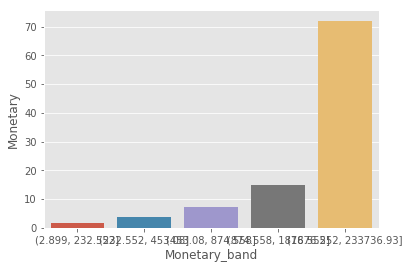

In [32]:
sns.barplot(x = parmoney.Monetary_band, y = parmoney.Monetary)

In [33]:
rfm_final = rfm.sort_values('Monetary', ascending=False)

import numpy as np

pareto_cutoff = 0.8 * (rfm_final['Monetary'].agg(sum))
rfm_final['pareto'] = ["Top 20%" if x <= pareto_cutoff else "Bottom 80%" for x in np.cumsum(rfm_final.Monetary)]

Text(0.5,1,'Monetary Value of Customers')

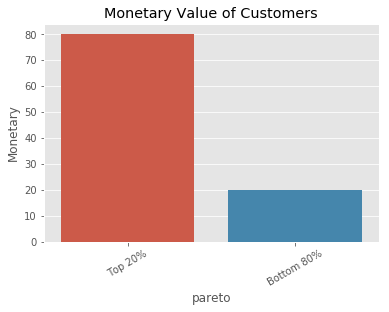

In [34]:
topmonetary = pd.DataFrame((rfm_final.groupby('pareto')['Monetary'].sum() / sum(rfm_final.Monetary) * 100)).reset_index().sort_values('pareto', ascending=False)

import matplotlib as mpl

mpl.style.available 

mpl.style.use('ggplot')


locs, labels = plt.xticks()
plt.setp(labels, rotation=30)
sns.barplot(x = topmonetary.pareto, y = topmonetary.Monetary)
plt.title('Monetary Value of Customers')

        RFM MATRIX

RFM is very used in marketing ti classify cusmers into segments.

In [35]:
""" RFM_df will be used in the following tasks to develop a matrix R-F-M """
# Notice that we attribute score 5 to the highest price(monetary), lowest recency and most frequent by keeping the same intervals created earlier
RFM_df = rfm.copy()

In [36]:
""" Recode Recency by creating a new col R """
l = []
for x in RFM_df.Recency:
    if x <= 12:
        l.append(5)
    elif x > 12 and x <= 31:
        l.append(4)
    elif x > 31 and x <= 68:
        l.append(3)
    elif x > 68 and x <= 172:
        l.append(2)
    else: 
        l.append(1)
RFM_df['R'] = l

RFM_df.head()

,Recency,Frequency,Monetary,R
CustomerID,,,,
12747.0,2.0,96,3837.45,5
12748.0,0.0,4016,29536.01,5
12749.0,3.0,199,4090.88,5
12820.0,3.0,59,942.34,5
12821.0,214.0,6,92.72,1


In [37]:
""" Recode Frequency by creating a new column F """
l = []
for x in RFM_df.Frequency:
    if x <= 13:
        l.append(1)
    elif x > 13 and x <= 29:
        l.append(2)
    elif x > 29 and x <= 57:
        l.append(3)
    elif x > 57 and x <= 117:
        l.append(4)
    else: 
        l.append(5)
RFM_df['F'] = l

RFM_df.head()

,Recency,Frequency,Monetary,R,F
CustomerID,,,,,
12747.0,2.0,96,3837.45,5,4
12748.0,0.0,4016,29536.01,5,5
12749.0,3.0,199,4090.88,5,5
12820.0,3.0,59,942.34,5,4
12821.0,214.0,6,92.72,1,1


In [38]:
""" Create a new col M by recoding Monetary """
l = []
for x in RFM_df.Monetary:
    if x <= 234.548:
        l.append(1)
    elif x > 234.548 and x <= 454.362:
        l.append(2)
    elif x > 454.362 and x <= 882.006:
        l.append(3)
    elif x > 882.006 and x <= 1879.518:
        l.append(4)
    else: 
        l.append(5)
RFM_df['M'] = l

RFM_df.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12747.0,2.0,96,3837.45,5,4,5
12748.0,0.0,4016,29536.01,5,5,5
12749.0,3.0,199,4090.88,5,5,5
12820.0,3.0,59,942.34,5,4,4
12821.0,214.0,6,92.72,1,1,1


In [39]:
RFM_df['RFMScore'] = RFM_df[['R', 'F', 'M']].apply(lambda row: str(row.R) + str(row.F) + str(row.M), axis = 1)

In [40]:
RFM_df[RFM_df.RFMScore == '555'].sort_values('Monetary', ascending=False).head()

,Recency,Frequency,Monetary,R,F,M,RFMScore
CustomerID,,,,,,,
18102.0,0.0,414,233736.93,5,5,5,555
17450.0,8.0,332,188536.59,5,5,5,555
17511.0,2.0,906,85085.70,5,5,5,555
16684.0,4.0,274,65920.12,5,5,5,555
14096.0,4.0,5111,65164.79,5,5,5,555


In [41]:
RFM_df[(RFM_df.Recency == 0) & (RFM_df.Frequency == 414)]

,Recency,Frequency,Monetary,R,F,M,RFMScore
CustomerID,,,,,,,
18102.0,0.0,414,233736.93,5,5,5,555


After creating the new column RFMScore, we can see for example that Customers 18102 has bought recently (recency = 0), buys frequently (Frequency = 414) and spent much money, which give him a score of 555. This is our best customer.

In [42]:
#Total customers per segment
RFM_df.groupby('RFMScore')['Recency'].count().nlargest()

RFMScore
555    277
111    236
122    128
455    128
211    102
Name: Recency, dtype: int64

In [43]:
#Find a top 5 customer who bought frequently
RFM_df.groupby('CustomerID')['Frequency'].sum().nlargest(5)

CustomerID
17841.0    7466
14096.0    5111
12748.0    4016
14606.0    2521
15311.0    2273
Name: Frequency, dtype: int64

Text(0.5,1,'RFM Score Count')

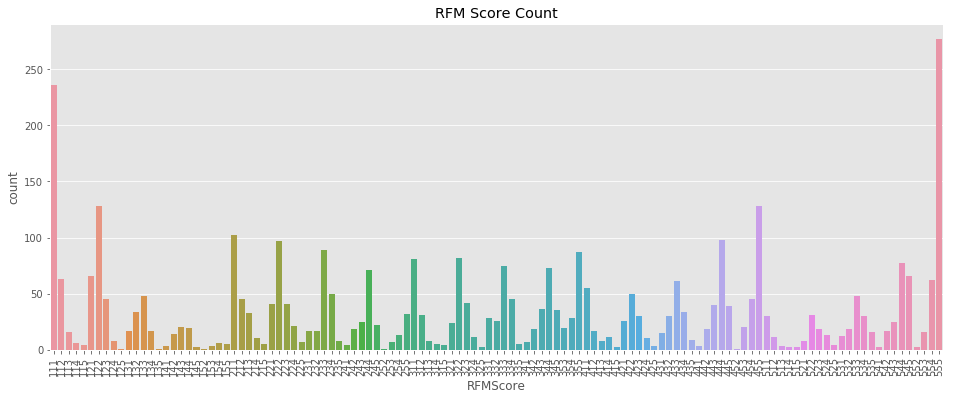

In [44]:
'''make a plot of RFMScore'''
fig,ax = plt.subplots(figsize=(16, 6))
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

sns.countplot(RFM_df.RFMScore.astype('category'))
plt.title('RFM Score Count')

The table and bar chart above show total customers grouped by RFMScore with 280 best customers scored 555.

Let's define another variable based on RFMScore and following the description below. These criteria can be made by a company to classify their customers.
Champions [R(4 – 5), F(4 – 5)]
Loyal Customers [R(3 – 4), F(4 – 5)]
Potential Loyalists [R(4 – 5), F(2 – 3)]
Promising [R(3 – 4), F(0 – 1)]
Can’t Lose Them [R(1 – 2), F(4 – 5)]
At Risk [R(1 – 2), F(3 – 4)]
About to Sleep [R(2 – 3), F(1-2)]
Hibernating [R(1 – 2), F(1 – 2)]
New Customers R [(4 – 5), F(0 – 1)]
Need Attention R [(2 – 3), F(2 – 3)]

In [45]:
""" Classify customers """
l = []

for x, y in RFM_df.iterrows():
    if y['R'] >= 4:
        if y['F'] <= 1:
            l.append('New Customers')
        elif y['F'] <= 3:
            l.append('Potential Loyalists')
        else:
            l.append('Champions')
    elif y['R'] <= 2:
        if y['F'] <= 2:
            l.append('Hibernating')
        elif y['F'] <= 4:
            l.append('At Risk')
        else:
            l.append('Can’t Lose Them')
    elif y['R'] <= 3:
        if y['F'] <= 2:
            l.append('About to Sleep')
        else:
            l.append('Need Attention')
    elif y['R'] <= 4:
        if y['F'] <= 1:
            l.append('Promising')
        else:
            l.append('Loyal Customers')

RFM_df['segment'] = l

In [46]:
RFM_df.head()

,Recency,Frequency,Monetary,R,F,M,RFMScore,segment
CustomerID,,,,,,,,
12747.0,2.0,96,3837.45,5,4,5,545,Champions
12748.0,0.0,4016,29536.01,5,5,5,555,Champions
12749.0,3.0,199,4090.88,5,5,5,555,Champions
12820.0,3.0,59,942.34,5,4,4,544,Champions
12821.0,214.0,6,92.72,1,1,1,111,Hibernating


In [47]:
p = pd.DataFrame(round(RFM_df.groupby('segment')['R'].count() / len(RFM_df) * 100, 2).sort_values(ascending=False).reset_index())
p.rename(columns = {'segment': 'segment', 'R':'proportion'}, inplace=True)
p

,segment,proportion
0,Hibernating,25.30
1,Champions,24.29
2,At Risk,12.87
3,Need Attention,12.51
4,Potential Loyalists,12.09
5,About to Sleep,7.52
6,New Customers,3.66
7,Can’t Lose Them,1.76


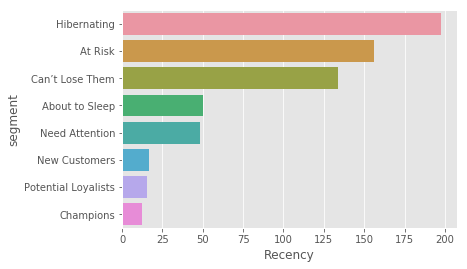

In [48]:
recperseg = round(RFM_df.groupby('segment')['Recency'].mean(), 2).sort_values(ascending=False).reset_index()
sns.barplot(x = recperseg.Recency, y = recperseg.segment)

The table, bar chart show the percentage of each segment. eg: ~25% of Champions and about the same for Hibernating.

        DISTRIBUTION OF RECENCY, FREQUENCY and MONETARY

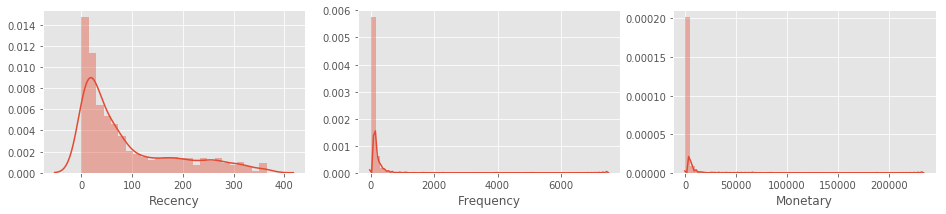

In [49]:
fig = plt.figure(figsize=(16, 3))
plt.subplot(1, 3, 1)
sns.distplot(rfm.Recency)
plt.subplot(1, 3, 2)
sns.distplot(rfm.Frequency)
plt.subplot(1, 3, 3)
sns.distplot(rfm.Monetary)

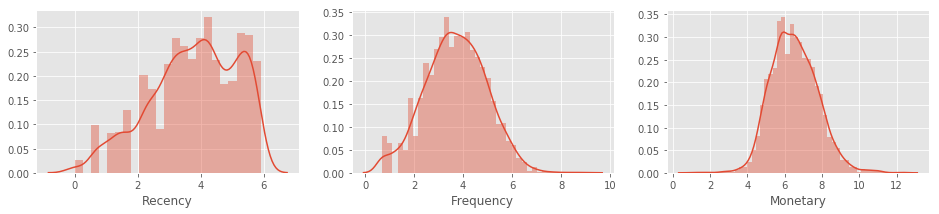

In [50]:
'''Transforming data to look like normaly distributed'''
fig = plt.figure(figsize=(16, 3))
plt.subplot(1, 3, 1)
sns.distplot(np.log1p(rfm.Recency))
plt.subplot(1, 3, 2)
sns.distplot(np.log1p(rfm.Frequency))
plt.subplot(1, 3, 3)
sns.distplot(np.log(rfm.Monetary))

In [51]:
""" Log transform the data to be normal """
log_rfm = rfm.copy()

def transform(x):
    return np.log1p(x)

log_rfm = log_rfm[['Recency', 'Frequency', 'Monetary']].apply(transform)

In [52]:
log_rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12747.0,1.098612,4.574711,8.252824
12748.0,0.000000,8.298291,10.293399
12749.0,1.386294,5.298317,8.316760
12820.0,1.386294,4.094345,6.849427
12821.0,5.370638,1.945910,4.540312


        Unsupervised Machine Learning
Some models like knn are very sensitive to scalling. Before applying it, we should transform the data, otherwise, we end up with this kind of clustering

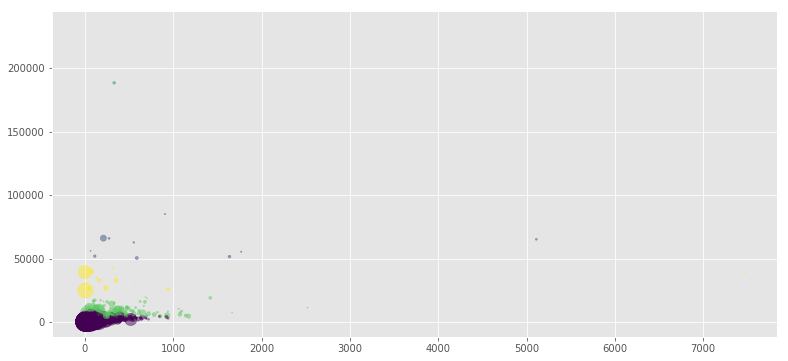

In [53]:
'''Clustering with kmeans'''
from sklearn.cluster import KMeans

#Without scaling or log transforming
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(rfm)

fig,ax = plt.subplots(figsize=(13,6))
plt.scatter(rfm.Frequency, rfm.Monetary, rfm.Recency, c = clusters, alpha = .5, cmap = 'viridis')

[320.2041070522045, 154.35274783165602, 111.2772346124638, 89.98547858169746, 75.21036387406483, 65.79382646495874, 58.49484378156843, 52.653424923940555, 47.89951534877743, 44.52404524464638, 41.29949835970684, 39.38259149068446, 37.42054013022465, 35.648113147744525]


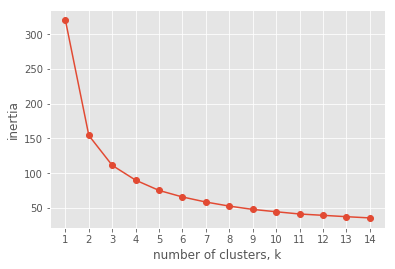

In [54]:
#Choosing the best k
from sklearn.preprocessing import maxabs_scale
ks = range(1, 15)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(maxabs_scale(log_rfm))
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
print(inertias)   
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


In [55]:
# k = 7 from the last result
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
normalizer = Normalizer()
maxscaler = MaxAbsScaler()
kmeans = KMeans(n_clusters=7, random_state=123)

pipeline = make_pipeline(maxscaler, kmeans)

cluster = pipeline.fit_predict(log_rfm)

In [56]:
df = pd.DataFrame({'segment': RFM_df.segment, 'clusters': cluster})

pd.crosstab(df['clusters'], df['segment'])


segment,About to Sleep,At Risk,Can’t Lose Them,Champions,Hibernating,Need Attention,New Customers,Potential Loyalists
clusters,,,,,,,,
0,0,0,0,513,0,26,0,10
1,0,0,0,0,486,0,0,0
2,10,178,50,60,14,417,0,38
3,0,316,18,0,321,0,0,0
4,280,2,0,0,154,39,71,57
5,0,0,0,306,0,0,1,38
6,0,0,0,57,0,0,69,323


We can see that some clusters match perfectly some segments. eg:"Hibernating" belongs to the cluster 1, other clusters contain a mixt of segments.

Text(0.5,1,'KNN Clustering')

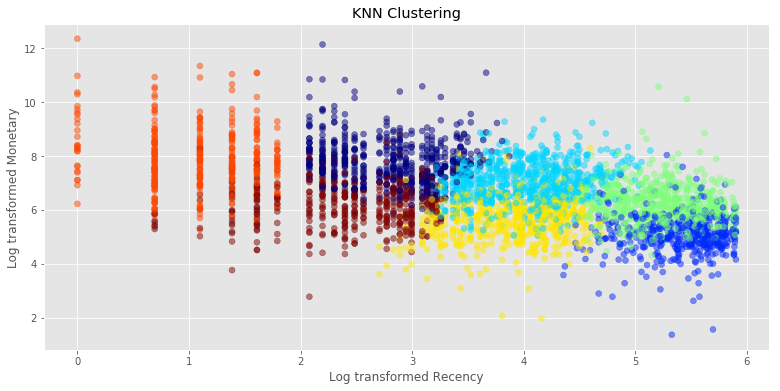

In [57]:
fig,ax = plt.subplots(figsize=(13,6))
plt.scatter(log_rfm.Recency, log_rfm.Monetary, c = cluster, cmap = 'jet', alpha = .5)
plt.xlabel('Log transformed Recency')
plt.ylabel('Log transformed Monetary')
plt.title('KNN Clustering')

Text(0.5,1,'Number of customers per cluster')

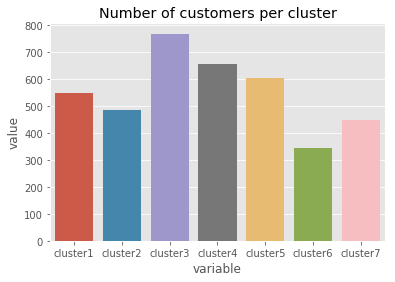

In [59]:
df = pd.DataFrame({'cluster': [i for i in cluster]})
df_clusters = pd.DataFrame(df.groupby('cluster')['cluster'].count()).melt()
df_clusters['variable'] = ['cluster1', 'cluster2', 'cluster3', 'cluster4', 'cluster5', 'cluster6', 'cluster7']
sns.barplot(x = 'variable', y = 'value', data = df_clusters)
plt.title("Number of customers per cluster")

In [60]:
knn_df = RFM_df
knn_df['cluster'] = cluster

In [130]:
knn_df.head()

,Recency,Frequency,Monetary,R,F,M,RFMScore,segment,cluster
CustomerID,,,,,,,,,
12747.0,2.0,96,3837.45,5,4,5,545,Champions,5
12748.0,0.0,4016,29536.01,5,5,5,555,Champions,5
12749.0,3.0,199,4090.88,5,5,5,555,Champions,5
12820.0,3.0,59,942.34,5,4,4,544,Champions,5
12821.0,214.0,6,92.72,1,1,1,111,Hibernating,1


Looking at some rows, we can see that the segment "Champions" belong to the cluster 5.

Text(0.5,1,'Customer Segmentation with GMM')

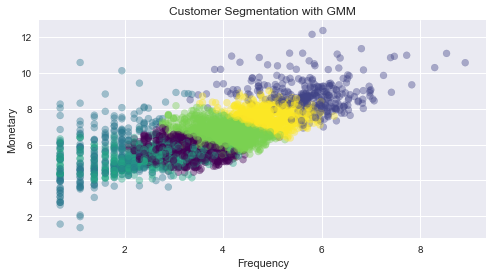

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import make_pipeline
from sklearn.mixture import GMM
import warnings
warnings.filterwarnings("ignore")


maxscaler = MaxAbsScaler()
gmm = GMM(n_components=6)

scaler = StandardScaler()

pipeline = make_pipeline(scaler, gmm)

labels = pipeline.fit_predict(log_rfm)



import matplotlib as mpl

mpl.style.available
mpl.style.use('seaborn')

fig,ax = plt.subplots(figsize=(8,4))
plt.scatter(log_rfm.Frequency, log_rfm.Monetary, c = labels, alpha = .4, cmap = 'viridis')
plt.xlabel("Frequency")
plt.ylabel("Monetary")
plt.title("Customer Segmentation with GMM")

The graph shows that the clusters are fairly separated except for the 3 first clusters.

In [62]:
df = pd.DataFrame({'segment': RFM_df.segment, 'labels': labels})

pd.crosstab(df['labels'], df['segment'])


segment,About to Sleep,At Risk,Can’t Lose Them,Champions,Hibernating,Need Attention,New Customers,Potential Loyalists
labels,,,,,,,,
0,194,84,0,4,285,66,38,190
1,0,0,2,304,0,14,0,6
2,76,0,0,0,146,0,103,1
3,0,41,0,0,512,0,0,0
4,20,325,11,222,32,225,0,261
5,0,46,55,406,0,177,0,8


"Hibernating" belongs to the cluster 3 and almost all cluster 1 captures "Champions". 

Text(0.5,1,'Total customers per cluster')

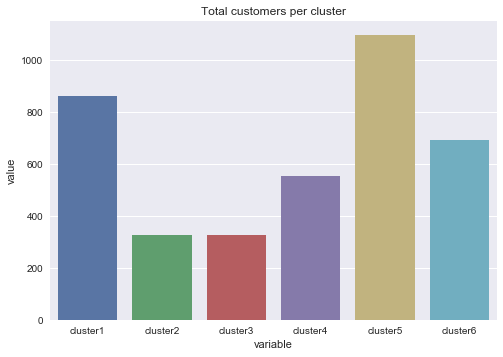

In [63]:
df = pd.DataFrame({'clusters': [i for i in labels]})
df_clusters = pd.DataFrame(df.groupby('clusters')['clusters'].count()).melt()
df_clusters['variable'] = ['cluster1', 'cluster2', 'cluster3', 'cluster4', 'cluster5', 'cluster6']
sns.barplot(x = 'variable', y = 'value', data = df_clusters)
plt.title("Total customers per cluster")

RFM is the base of segmenting customers into clusters and helps to focus into a particular segments.
Unsupervised ML helps finding homogenious groups, which helps finding patterns and similiarities among groups. 

In [65]:
#Another type of unsupervised ML is hierarchical clustering
from scipy.cluster.hierarchy import linkage, dendrogram
f = rfm.copy()
f.reset_index(inplace=True)
f.drop('CustomerID', axis=1, inplace=True)
r = rfm.reset_index().CustomerID.values

In [66]:
from sklearn.preprocessing import normalize
normalized_df = normalize(f)
mergings = linkage(normalized_df, method='complete')

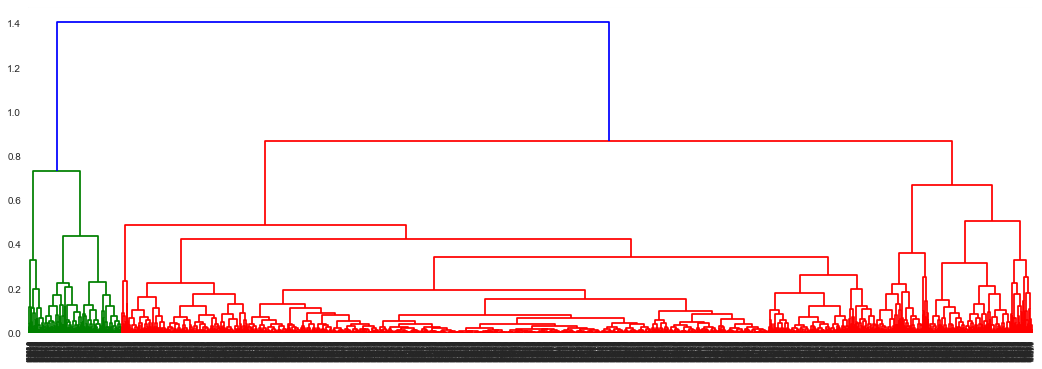

In [67]:
fig = plt.figure(figsize=(18,6))

dendrogram(mergings,
          labels=r,
          leaf_rotation=90,
          leaf_font_size=6)
plt.show()

In [68]:
#Cut the tree at height=.8
from scipy.cluster.hierarchy import fcluster
labels = fcluster(mergings, .8, criterion='distance')

pairs = pd.DataFrame({'labels': labels, 'Customers': r})

df = pd.DataFrame({'labels': labels, 'Segment': RFM_df.segment})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['Segment'])

# Display ct
print(ct)

Segment  About to Sleep  At Risk  Can’t Lose Them  Champions  Hibernating  \
labels                                                                      
1                     4       23                0          0          330   
2                   242      353               62        936          255   
3                    44      120                6          0          390   

Segment  Need Attention  New Customers  Potential Loyalists  
labels                                                       
1                     0              1                    0  
2                   456            134                  459  
3                    26              6                    7  


Text(0.5,1,'KNN Clustering')

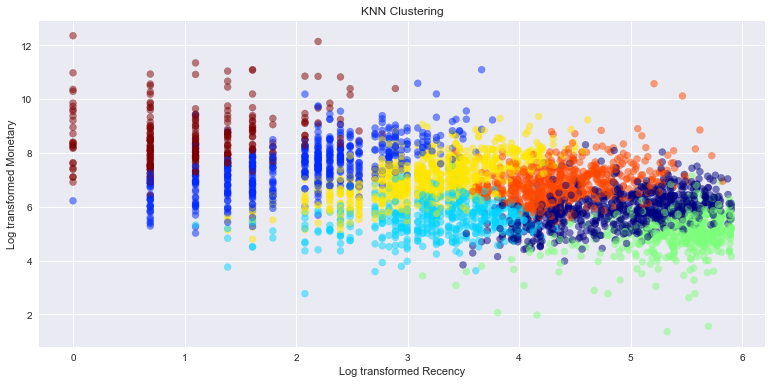

In [70]:
# Create a TruncatedSVD instance: svd
from sklearn.decomposition import TruncatedSVD

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=2)

kmeans = KMeans(n_clusters=7, random_state=123)

maxscaler = MaxAbsScaler()
pipeline = make_pipeline(svd, maxscaler, kmeans)

cluster = pipeline.fit_predict(log_rfm)

#Plot data with clusters
fig,ax = plt.subplots(figsize=(13,6))
plt.scatter(log_rfm.Recency, log_rfm.Monetary, c = cluster, cmap = 'jet', alpha = .5)
plt.xlabel('Log transformed Recency')
plt.ylabel('Log transformed Monetary')
plt.title('KNN Clustering')

Text(0.5,1,'KNN Clustering')

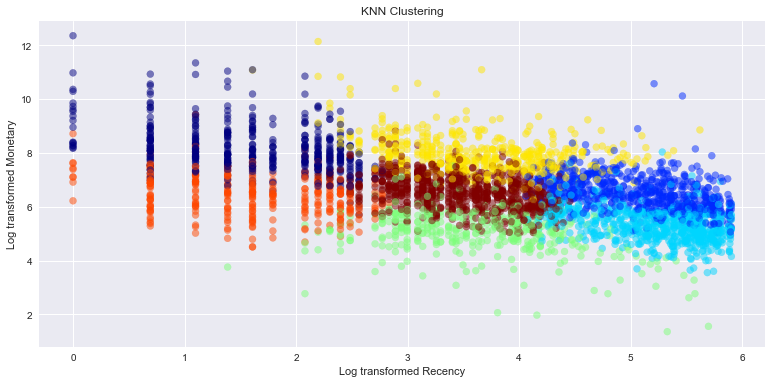

In [71]:
# Create a PCA instance: pca
from sklearn.decomposition import PCA

#Create a pca model with 2 components and a pipeline
pca = PCA(n_components=2)

pipeline = make_pipeline(pca, maxscaler, kmeans)

kmeans = KMeans(n_clusters=7, random_state=123)

maxscaler = MaxAbsScaler()

cluster = pipeline.fit_predict(log_rfm)


#Plot the data with clusters
fig,ax = plt.subplots(figsize=(13,6))
plt.scatter(log_rfm.Recency, log_rfm.Monetary, c = cluster, cmap = 'jet', alpha = .5)
plt.xlabel('Log transformed Recency')
plt.ylabel('Log transformed Monetary')
plt.title('KNN Clustering')

This tutorial illustrates some useful models that we can use to make homogenious groups.
The clusters can be treated in business differently.
PCA is widely used before supervised ML.
RFM is used in marketing to classify their customers and know them well and focus on particular segments.